In [1]:
import pandas as pd
df = pd.read_csv("smokerscoredata.csv")
df.head()

,smoker,marital_status,Age,BMI,budget_encoded,drink_level-abstemious,drink_level-casual drinker,drink_level-social drinker,interest-eco-friendly,interest-none,interest-retro,interest-technology,interest-variety,religion-Catholic,religion-Christian,religion-Jewish,religion-Mormon,religion-none,Scored Labels,Scored Probabilities
0,False,single,0.031250,0.357468,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,False,0.076126
1,False,single,0.078125,0.571012,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,0.385825
2,False,single,0.093750,0.696908,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,0.312857
3,False,single,0.046875,0.352951,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True,0.593713
4,False,single,0.078125,0.337329,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,0.209366


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import linregress

# Load your data
df = pd.read_csv("smokerscoredata.csv")

# Preview the data
print("Data columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

def create_smoker_visualization(df, figsize=(14, 10), dpi=120):
    """
    Creates comprehensive visualizations for smoker prediction results using matplotlib only
    """
    # Create figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize, dpi=dpi)
    
    # Convert boolean to numeric
    actual_numeric = df['smoker'].astype(int)
    
    # --- Scatter Plot ---
    # Add jitter
    jitter = np.random.normal(0, 0.04, size=len(actual_numeric))
    jittered_actual = actual_numeric + jitter
    
    # Create scatter plot with color by actual class
    colors = ['blue' if x == 0 else 'red' for x in actual_numeric]
    ax1.scatter(
        x=jittered_actual,
        y=df['Scored Probabilities'],
        c=colors,
        alpha=0.7,
        edgecolors='w',
        linewidths=0.5,
        s=60
    )
    
    # Add reference lines
    ax1.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(0.5, color='gray', linestyle='--', alpha=0.5)
    ax1.plot([0, 1], [0, 1], 'g--', alpha=0.5, label='Perfect prediction')
    
    # Formatting
    ax1.set_title('Actual vs Predicted Probabilities', pad=15)
    ax1.set_xlabel('Actual Smoker Status (with jitter)', labelpad=10)
    ax1.set_ylabel('Predicted Probability', labelpad=10)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['Non-Smoker', 'Smoker'])
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.set_xlim(-0.2, 1.2)
    ax1.grid(True, which='major', linestyle='--', alpha=0.7)
    ax1.grid(True, which='minor', linestyle=':', alpha=0.4)
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    
    # Create a proxy artist for legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='blue', label='Non-Smoker'),
                       Patch(facecolor='red', label='Smoker')]
    ax1.legend(handles=legend_elements)
    
    # --- Probability Distribution Histogram ---
    # Separate data
    non_smoker_probs = df[df['smoker'] == False]['Scored Probabilities']
    smoker_probs = df[df['smoker'] == True]['Scored Probabilities']
    
    # Plot histograms
    ax2.hist(non_smoker_probs, bins=20, alpha=0.6, color='blue', density=True, label='Non-Smoker')
    ax2.hist(smoker_probs, bins=20, alpha=0.6, color='red', density=True, label='Smoker')
    
    ax2.set_title('Probability Distribution by Class')
    ax2.set_xlabel('Predicted Probability of Smoking')
    ax2.set_ylabel('Density')
    ax2.axvline(0.5, color='black', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # --- Cumulative Distribution ---
    for label, color in [(False, 'blue'), (True, 'red')]:
        subset = df[df['smoker'] == label]
        counts, bin_edges = np.histogram(subset['Scored Probabilities'], bins=50, density=True)
        cdf = np.cumsum(counts)/np.sum(counts)
        ax3.plot(bin_edges[1:], cdf, color=color, 
                 label='Smoker' if label else 'Non-Smoker', linewidth=2)
    
    ax3.set

Data columns: ['smoker', 'marital_status', 'Age', 'BMI', 'budget_encoded', 'drink_level-abstemious', 'drink_level-casual drinker', 'drink_level-social drinker', 'interest-eco-friendly', 'interest-none', 'interest-retro', 'interest-technology', 'interest-variety', 'religion-Catholic', 'religion-Christian', 'religion-Jewish', 'religion-Mormon', 'religion-none', 'Scored Labels', 'Scored Probabilities']

First 5 rows:
   smoker marital_status       Age       BMI  budget_encoded  \
0   False         single  0.031250  0.357468             1.0   
1   False         single  0.078125  0.571012             0.0   
2   False         single  0.093750  0.696908             0.0   
3   False         single  0.046875  0.352951             0.0   
4   False         single  0.078125  0.337329             1.0   

   drink_level-abstemious  drink_level-casual drinker  \
0                     1.0                         0.0   
1                     0.0                         0.0   
2                     0.0 

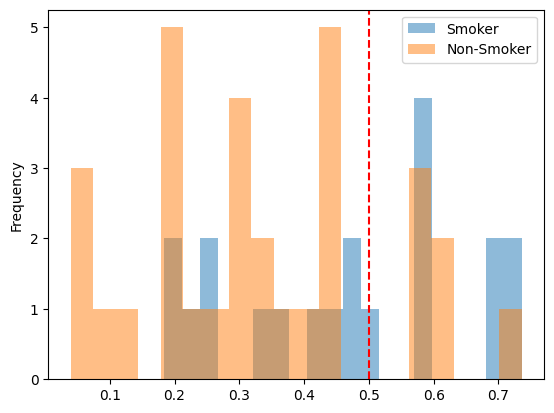

In [8]:
df[df['smoker']]['Scored Probabilities'].plot(kind='hist', alpha=0.5, bins=20, label='Smoker')
df[~df['smoker']]['Scored Probabilities'].plot(kind='hist', alpha=0.5, bins=20, label='Non-Smoker')
plt.axvline(0.5, color='red', linestyle='--')
plt.legend()
plt.show()

Data columns: ['smoker', 'marital_status', 'Age', 'BMI', 'budget_encoded', 'drink_level-abstemious', 'drink_level-casual drinker', 'drink_level-social drinker', 'interest-eco-friendly', 'interest-none', 'interest-retro', 'interest-technology', 'interest-variety', 'religion-Catholic', 'religion-Christian', 'religion-Jewish', 'religion-Mormon', 'religion-none', 'Scored Labels', 'Scored Probabilities']

First 5 rows:


,smoker,marital_status,Age,BMI,budget_encoded,drink_level-abstemious,drink_level-casual drinker,drink_level-social drinker,interest-eco-friendly,interest-none,interest-retro,interest-technology,interest-variety,religion-Catholic,religion-Christian,religion-Jewish,religion-Mormon,religion-none,Scored Labels,Scored Probabilities
0,False,single,0.031250,0.357468,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,False,0.076126
1,False,single,0.078125,0.571012,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,0.385825
2,False,single,0.093750,0.696908,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,0.312857
3,False,single,0.046875,0.352951,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True,0.593713
4,False,single,0.078125,0.337329,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,0.209366


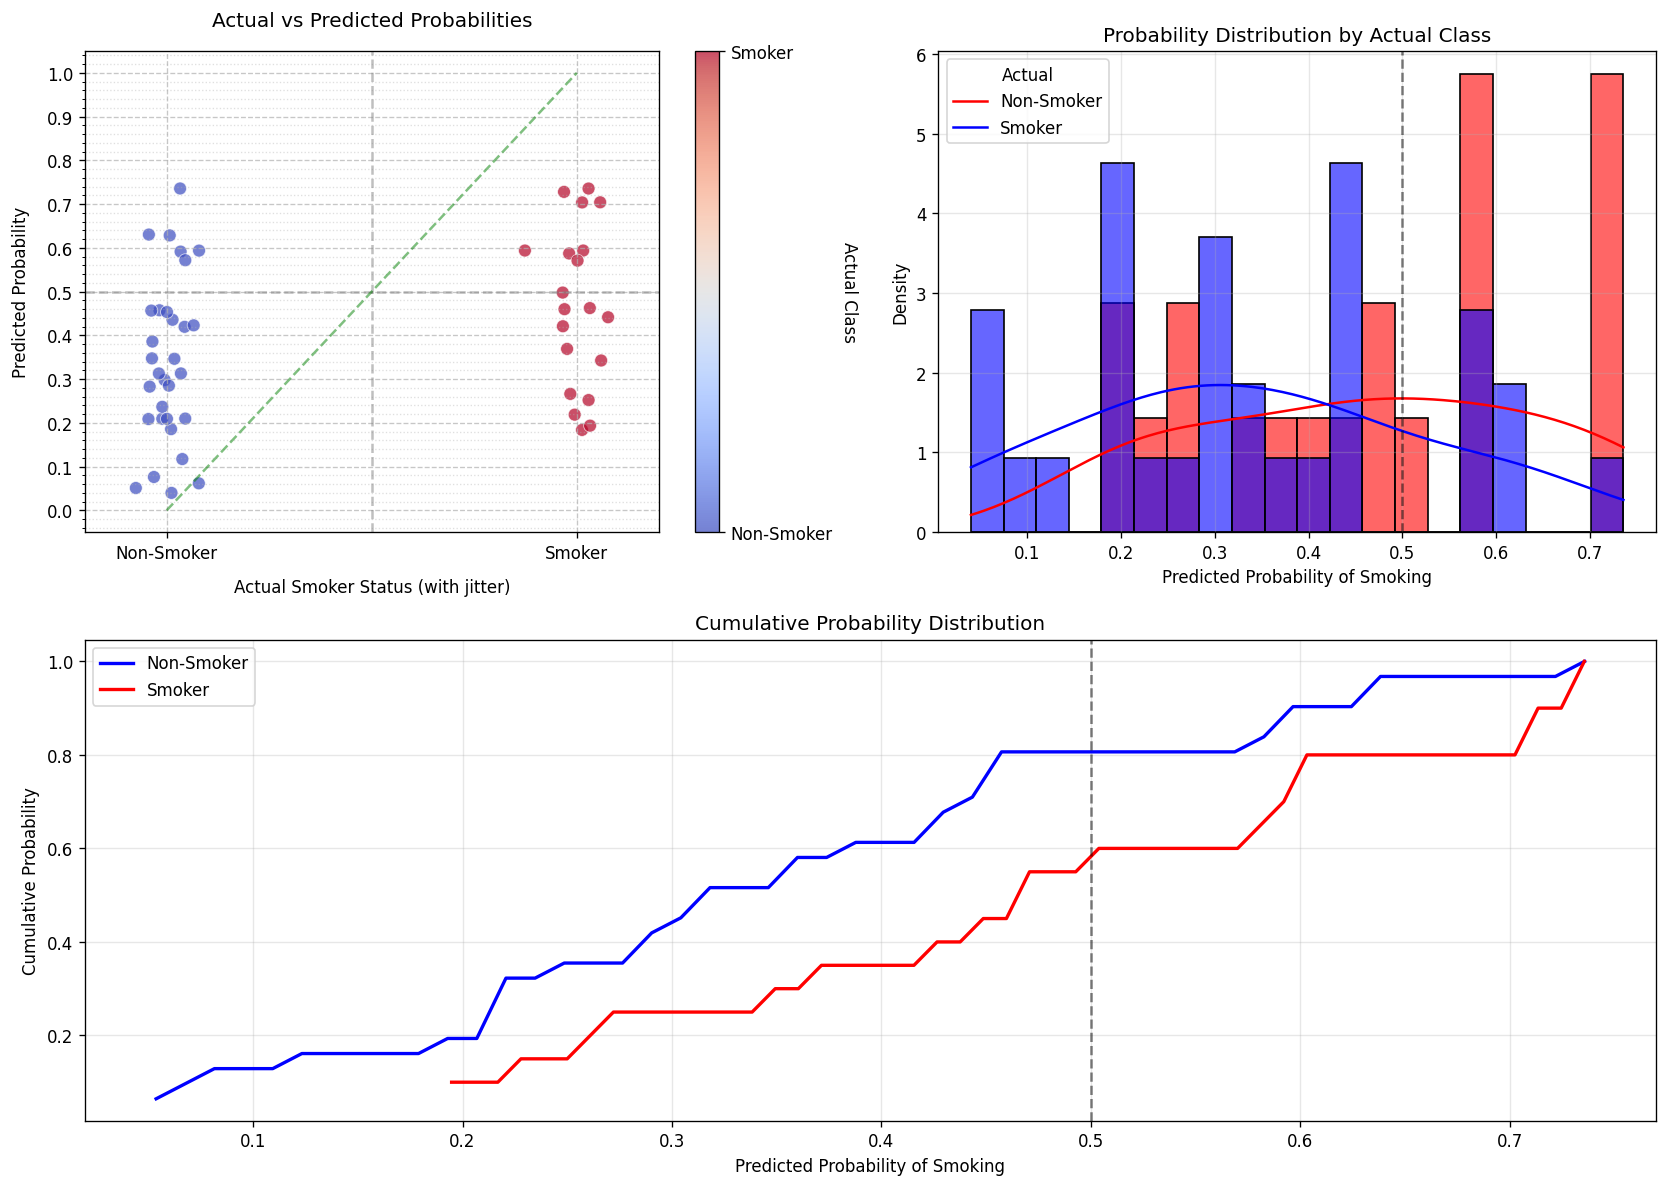


Model Performance Metrics:
Metric                        Non-Smokers    Smokers        
------------------------------------------------------------
Mean probability              0.3410     0.4662
Median probability            0.3129     0.4610
Probability overlap at 0.5    19.35%     60.00%


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import linregress

# Load your data
df = pd.read_csv("smokerscoredata.csv")

# Preview the data
print("Data columns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

def create_smoker_visualization(df, figsize=(14, 10), dpi=120):
    """
    Creates comprehensive visualizations for smoker prediction results including:
    - Scatter plot of actual vs predicted
    - Probability distribution histograms
    - Cumulative distribution curves
    """
    # Create figure with subplots
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(2, 2)
    
    # Convert boolean to numeric
    actual_numeric = df['smoker'].astype(int)
    
    # --- Scatter Plot ---
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Add jitter
    jitter = np.random.normal(0, 0.04, size=len(actual_numeric))
    jittered_actual = actual_numeric + jitter
    
    # Create scatter plot
    scatter = ax1.scatter(
        x=jittered_actual,
        y=df['Scored Probabilities'],
        c=actual_numeric,
        cmap='coolwarm',
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5,
        s=60
    )
    
    # Add reference lines
    ax1.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(0.5, color='gray', linestyle='--', alpha=0.5)
    ax1.plot([0, 1], [0, 1], 'g--', alpha=0.5, label='Perfect prediction')
    
    # Formatting
    ax1.set_title('Actual vs Predicted Probabilities', pad=15)
    ax1.set_xlabel('Actual Smoker Status (with jitter)', labelpad=10)
    ax1.set_ylabel('Predicted Probability', labelpad=10)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['Non-Smoker', 'Smoker'])
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.set_xlim(-0.2, 1.2)
    ax1.grid(True, which='major', linestyle='--', alpha=0.7)
    ax1.grid(True, which='minor', linestyle=':', alpha=0.4)
    ax1.yaxis.set_minor_locator(AutoMinorLocator())
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax1, ticks=[0, 1])
    cbar.set_ticklabels(['Non-Smoker', 'Smoker'])
    cbar.set_label('Actual Class', rotation=270, labelpad=15)
    
    # --- Probability Distribution Histogram ---
    ax2 = fig.add_subplot(gs[0, 1])
    
    sns.histplot(
        data=df,
        x='Scored Probabilities',
        hue='smoker',
        bins=20,
        kde=True,
        stat='density',
        common_norm=False,
        palette={False: 'blue', True: 'red'},
        alpha=0.6,
        ax=ax2
    )
    
    ax2.set_title('Probability Distribution by Actual Class')
    ax2.set_xlabel('Predicted Probability of Smoking')
    ax2.set_ylabel('Density')
    ax2.axvline(0.5, color='black', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    ax2.legend(title='Actual', labels=['Non-Smoker', 'Smoker'])
    
    # --- Cumulative Distribution ---
    ax3 = fig.add_subplot(gs[1, :])  # Span bottom row
    
    for label, color in [(False, 'blue'), (True, 'red')]:
        subset = df[df['smoker'] == label]
        counts, bin_edges = np.histogram(subset['Scored Probabilities'], bins=50, density=True)
        cdf = np.cumsum(counts)/np.sum(counts)
        ax3.plot(bin_edges[1:], cdf, color=color, 
                 label='Smoker' if label else 'Non-Smoker', linewidth=2)
    
    ax3.set_title('Cumulative Probability Distribution')
    ax3.set_xlabel('Predicted Probability of Smoking')
    ax3.set_ylabel('Cumulative Probability')
    ax3.axvline(0.5, color='black', linestyle='--', alpha=0.5)
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    plt.tight_layout()
    return plt

# Create and show the plot
plot = create_smoker_visualization(df)
plt.show()

# Enhanced performance metrics
print("\nModel Performance Metrics:")
print(f"{'Metric':<30}{'Non-Smokers':<15}{'Smokers':<15}")
print("-"*60)
print(f"{'Mean probability':<30}{df[~df['smoker']]['Scored Probabilities'].mean():.4f}{'':<5}{df[df['smoker']]['Scored Probabilities'].mean():.4f}")
print(f"{'Median probability':<30}{df[~df['smoker']]['Scored Probabilities'].median():.4f}{'':<5}{df[df['smoker']]['Scored Probabilities'].median():.4f}")
print(f"{'Probability overlap at 0.5':<30}{(df[~df['smoker']]['Scored Probabilities'] > 0.5).mean():.2%}{'':<5}{(df[df['smoker']]['Scored Probabilities'] < 0.5).mean():.2%}")

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load your data
df = pd.read_csv("smokerscoredata.csv")

# Set up the figure
plt.figure(figsize=(14, 6), dpi=120)

# Plot 1: Histogram of predicted probabilities by actual class
plt.subplot(1, 2, 1)
sns.histplot(
    data=df,
    x='Scored Probabilities',
    hue='smoker',
    bins=20,
    kde=True,
    stat='probability',
    common_norm=False,
    palette={False: 'blue', True: 'red'},
    alpha=0.6
)

plt.title('Probability Distribution by Actual Class')
plt.xlabel('Predicted Probability of Smoking')
plt.ylabel('Density')
plt.axvline(0.5, color='black', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend(title='Actual', labels=['Non-Smoker', 'Smoker'])

# Plot 2: Cumulative distribution
plt.subplot(1, 2, 2)
for label, color in [(False, 'blue'), (True, 'red')]:
    subset = df[df['smoker'] == label]
    counts, bin_edges = np.histogram(subset['Scored Probabilities'], bins=50, density=True)
    cdf = np.cumsum(counts)/np.sum(counts)
    plt.plot(bin_edges[1:], cdf, color=color, 
             label='Smoker' if label else 'Non-Smoker', linewidth=2)

plt.title('Cumulative Probability Distribution')
plt.xlabel('Predicted Probability of Smoking')
plt.ylabel('Cumulative Probability')
plt.axvline(0.5, color='black', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Calculate separation metrics
smoker_probs = df[df['smoker']]['Scored Probabilities']
non_smoker_probs = df[~df['smoker']]['Scored Probabilities']

print(f"\nProbability Separation Metrics:")
print(f"Mean probability for smokers: {smoker_probs.mean():.3f}")
print(f"Mean probability for non-smokers: {non_smoker_probs.mean():.3f}")
print(f"Probability difference: {smoker_probs.mean() - non_smoker_probs.mean():.3f}")
print(f"KS Statistic: {np.max(np.abs(np.cumsum(smoker_probs)/len(smoker_probs) - np.cumsum(non_smoker_probs)/len(non_smoker_probs)):.3f}")

SyntaxError: f-string: closing parenthesis '}' does not match opening parenthesis '(' (767292186.py, line 61)

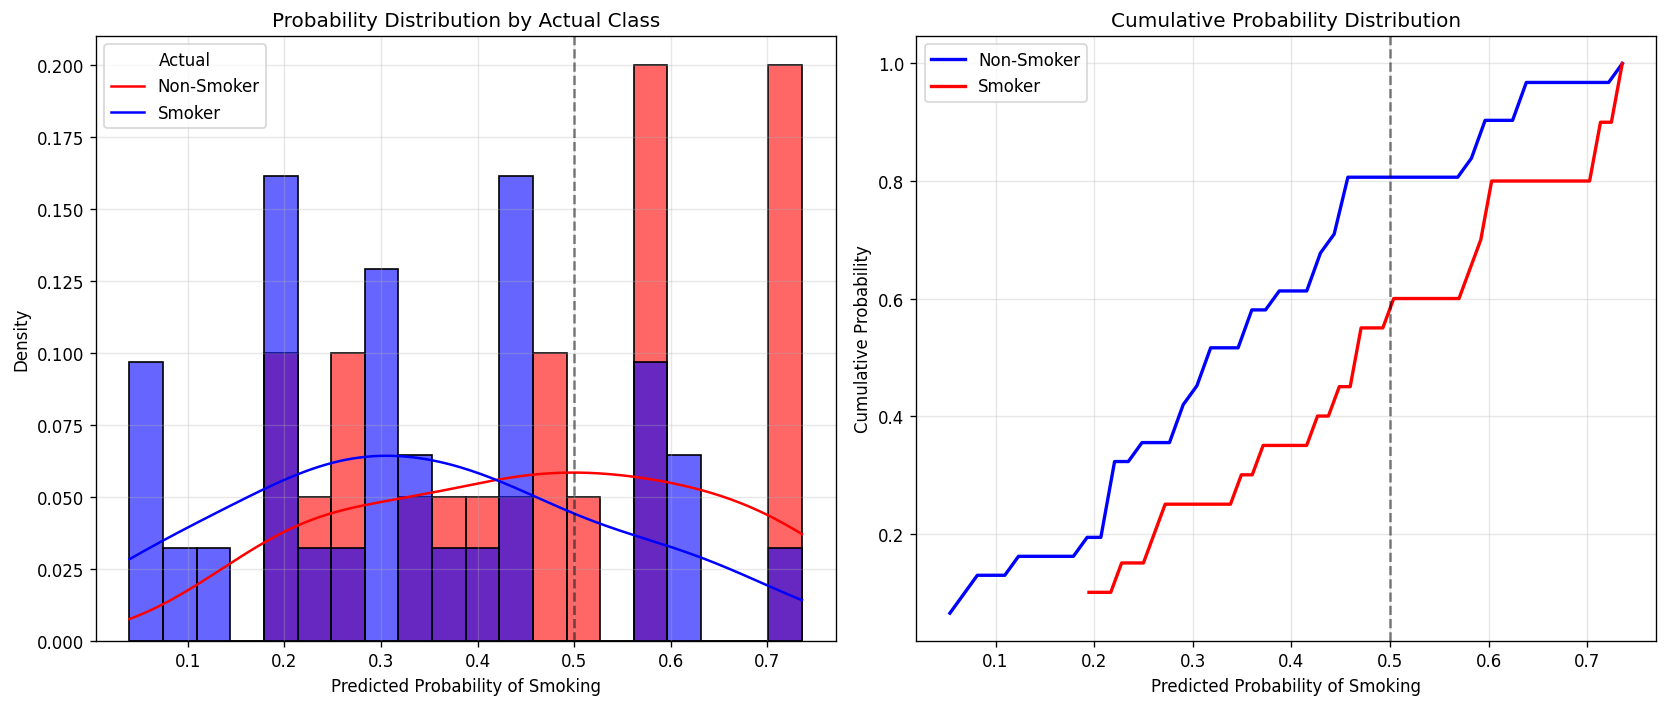


Probability Separation Metrics:
Metric                        Non-Smokers    Smokers        
------------------------------------------------------------
Mean probability              0.3410     0.4662
Median probability            0.3129     0.4610
Probability overlap at 0.5    19.35%     60.00%
KS Statistic: nan


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load your data
df = pd.read_csv("smokerscoredata.csv")

# Set up the figure
plt.figure(figsize=(14, 6), dpi=120)

# Plot 1: Histogram of predicted probabilities by actual class
plt.subplot(1, 2, 1)
sns.histplot(
    data=df,
    x='Scored Probabilities',
    hue='smoker',
    bins=20,
    kde=True,
    stat='probability',
    common_norm=False,
    palette={False: 'blue', True: 'red'},
    alpha=0.6
)

plt.title('Probability Distribution by Actual Class')
plt.xlabel('Predicted Probability of Smoking')
plt.ylabel('Density')
plt.axvline(0.5, color='black', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend(title='Actual', labels=['Non-Smoker', 'Smoker'])

# Plot 2: Cumulative distribution
plt.subplot(1, 2, 2)
for label, color in [(False, 'blue'), (True, 'red')]:
    subset = df[df['smoker'] == label]
    counts, bin_edges = np.histogram(subset['Scored Probabilities'], bins=50, density=True)
    cdf = np.cumsum(counts)/np.sum(counts)
    plt.plot(bin_edges[1:], cdf, color=color, 
             label='Smoker' if label else 'Non-Smoker', linewidth=2)

plt.title('Cumulative Probability Distribution')
plt.xlabel('Predicted Probability of Smoking')
plt.ylabel('Cumulative Probability')
plt.axvline(0.5, color='black', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Calculate separation metrics
smoker_probs = df[df['smoker']]['Scored Probabilities']
non_smoker_probs = df[~df['smoker']]['Scored Probabilities']

print("\nProbability Separation Metrics:")
print(f"{'Metric':<30}{'Non-Smokers':<15}{'Smokers':<15}")
print("-"*60)
print(f"{'Mean probability':<30}{non_smoker_probs.mean():.4f}{'':<5}{smoker_probs.mean():.4f}")
print(f"{'Median probability':<30}{non_smoker_probs.median():.4f}{'':<5}{smoker_probs.median():.4f}")
print(f"{'Probability overlap at 0.5':<30}{(non_smoker_probs > 0.5).mean():.2%}{'':<5}{(smoker_probs < 0.5).mean():.2%}")

# Calculate KS statistic correctly
ks_statistic = np.max(np.abs(np.cumsum(smoker_probs)/len(smoker_probs) - np.cumsum(non_smoker_probs)/len(non_smoker_probs)))
print(f"KS Statistic: {ks_statistic:.3f}")

In [12]:
# Calculate smoking probability by profile
profile = df.groupby(['marital_status', 'drink_level-social drinker'])[['smoker']].mean()
print("\nSmoking Probability by Profile:")
print(profile.sort_values('smoker', ascending=False).head(5))


Smoking Probability by Profile:
                                             smoker
marital_status drink_level-social drinker          
single         0.483034                    1.000000
               0.545068                    1.000000
               1.000000                    0.529412
married        1.000000                    0.333333
single         0.000000                    0.275862


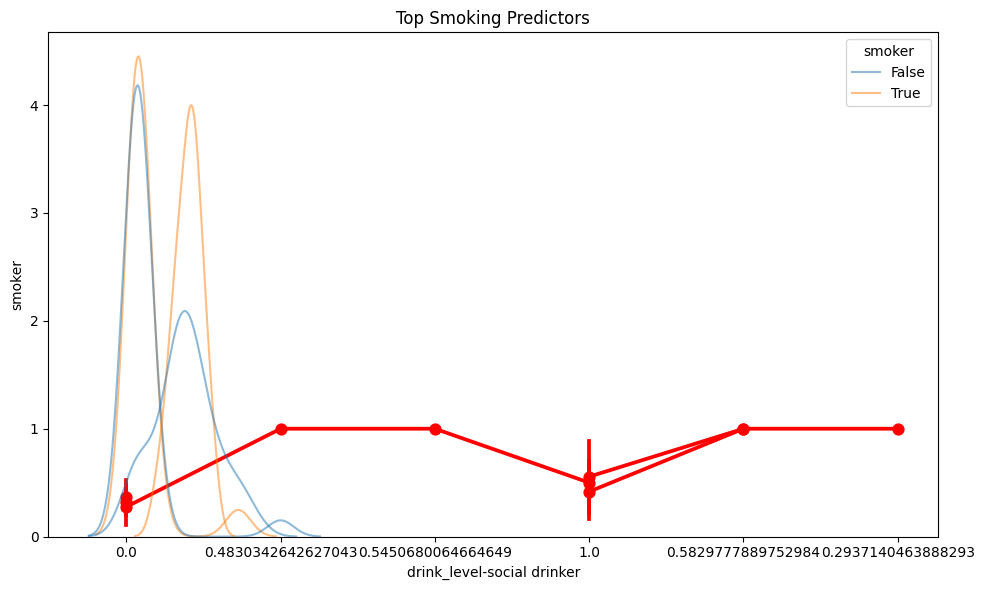

In [13]:
# Combined Impact Plot
fig, ax = plt.subplots(figsize=(10, 6))
top_factors = ['drink_level-social drinker', 'interest-technology', 'religion-none', 'Age', 'BMI']
for factor in top_factors:
    if df[factor].nunique() > 5:  # Continuous
        sns.kdeplot(data=df, x=factor, hue='smoker', common_norm=False, ax=ax, alpha=0.5)
    else:  # Binary
        sns.pointplot(data=df, x=factor, y='smoker', ax=ax, color='red')
ax.set_title('Top Smoking Predictors')
plt.tight_layout()
plt.show()

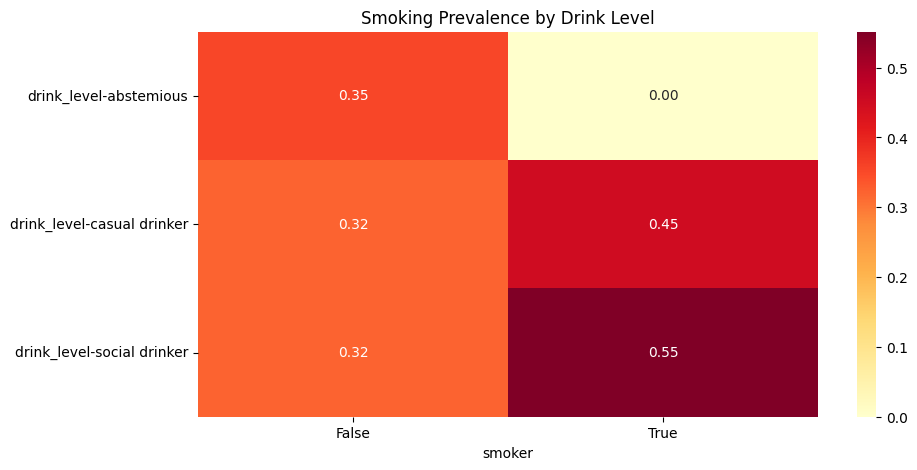

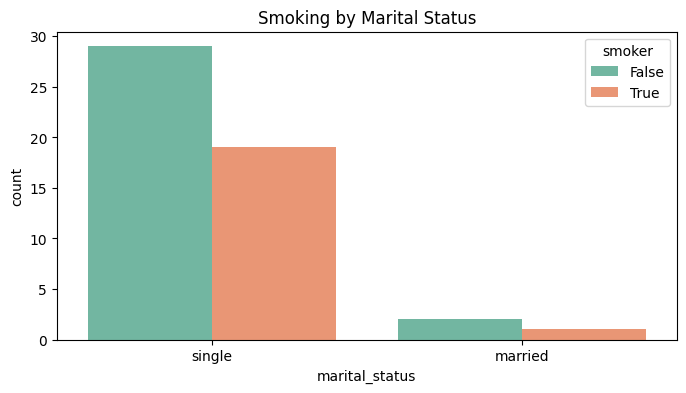

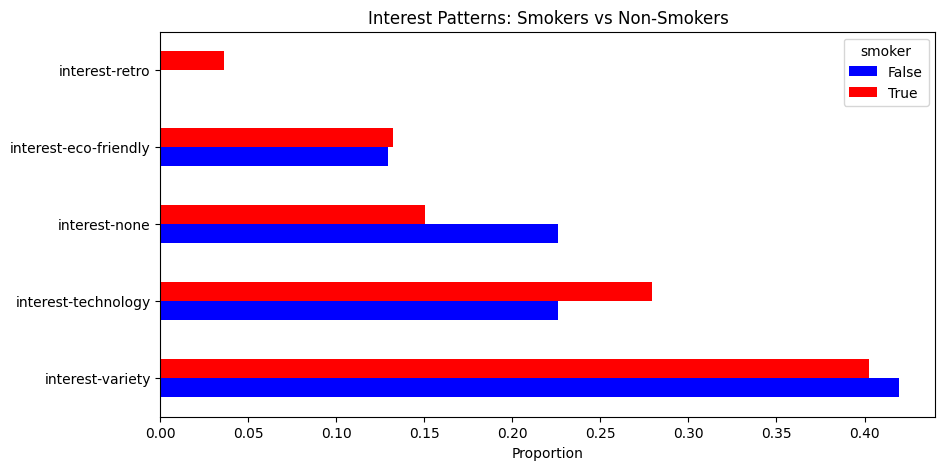

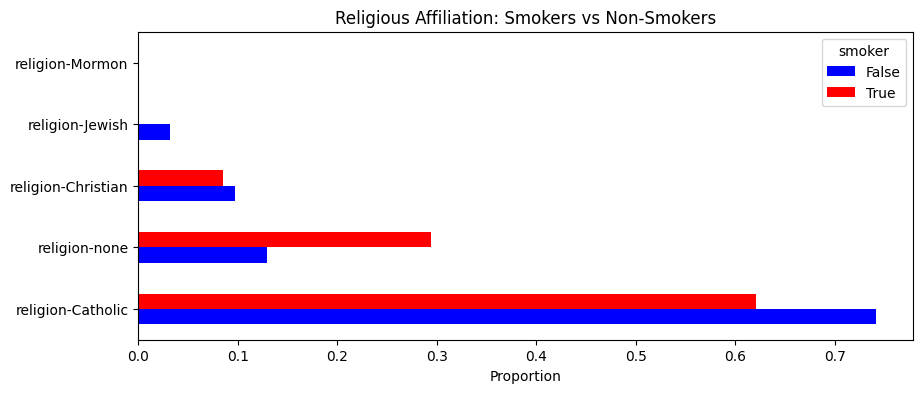

/tmp/ipykernel_4524/3106583277.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y=feature, ax=axes[i], palette='Set3')
/tmp/ipykernel_4524/3106583277.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y=feature, ax=axes[i], palette='Set3')
/tmp/ipykernel_4524/3106583277.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y=feature, ax=axes[i], palette='Set3')


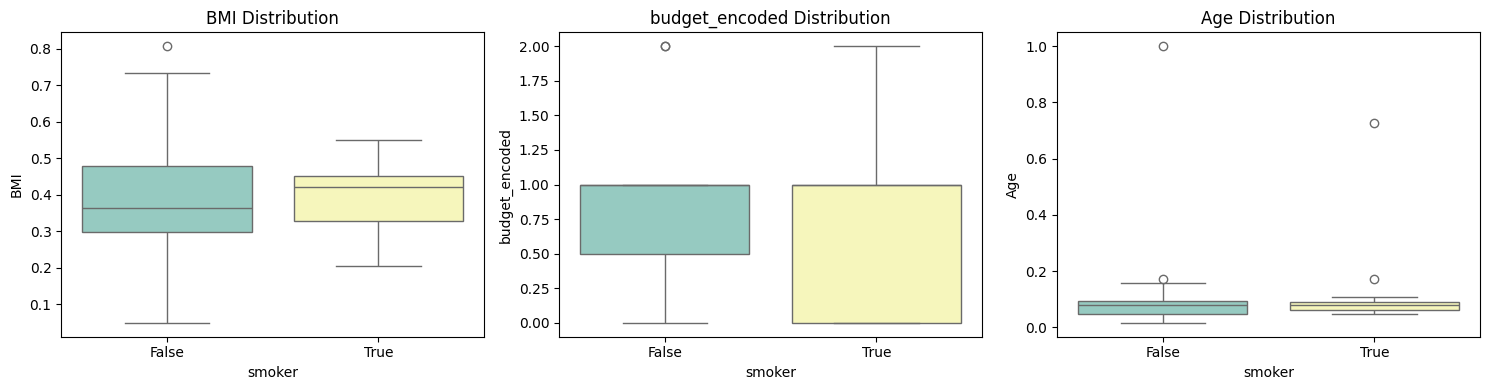


Statistical Significance (p-values):
BMI: 0.7223
budget_encoded: 0.2759
Age: 0.8738
marital_status: 1.0000
interest-eco-friendly: 0.3533
interest-none: 0.2406
interest-retro: 0.8235
interest-technology: 0.4339
interest-variety: 0.2352
religion-Catholic: 0.3236
religion-Christian: 0.3888
religion-Jewish: 1.0000
religion-Mormon: 1.0000
religion-none: 0.1820


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("smokerscoredata.csv")

# 1. Drink Level Analysis
plt.figure(figsize=(10, 5))
drink_cols = [c for c in df.columns if 'drink_level' in c]
drink_impact = df.groupby('smoker')[drink_cols].mean().T
sns.heatmap(drink_impact, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Smoking Prevalence by Drink Level')
plt.show()

# 2. Marital Status Impact
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='marital_status', hue='smoker', palette='Set2')
plt.title('Smoking by Marital Status')
plt.show()

# 3. Interest Analysis
interest_cols = [c for c in df.columns if 'interest-' in c]
interest_impact = df.groupby('smoker')[interest_cols].mean().T.sort_values(by=True, ascending=False)
interest_impact.plot(kind='barh', figsize=(10, 5), color=['blue','red'])
plt.title('Interest Patterns: Smokers vs Non-Smokers')
plt.xlabel('Proportion')
plt.show()

# 4. Religion Analysis
religion_cols = [c for c in df.columns if 'religion-' in c]
religion_impact = df.groupby('smoker')[religion_cols].mean().T.sort_values(by=True, ascending=False)
religion_impact.plot(kind='barh', figsize=(10, 4), color=['blue','red'])
plt.title('Religious Affiliation: Smokers vs Non-Smokers')
plt.xlabel('Proportion')
plt.show()

# 5. Continuous Features Analysis
cont_features = ['BMI', 'budget_encoded', 'Age']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, feature in enumerate(cont_features):
    sns.boxplot(data=df, x='smoker', y=feature, ax=axes[i], palette='Set3')
    axes[i].set_title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# 6. Statistical Significance Testing
from scipy.stats import ttest_ind, chi2_contingency

print("\nStatistical Significance (p-values):")
# For continuous features
for feature in cont_features:
    t_stat, p_val = ttest_ind(
        df[df['smoker']][feature],
        df[~df['smoker']][feature]
    )
    print(f"{feature}: {p_val:.4f}")

# For categorical features
for feature in ['marital_status'] + interest_cols + religion_cols:
    contingency = pd.crosstab(df['smoker'], df[feature])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    print(f"{feature}: {p_val:.4f}")

In [15]:
# 1. Demographic breakdown of high-risk groups
high_risk = df[(df['drink_level-social drinker'] == 1) & (df['smoker'] == True)]
print(high_risk[['Age', 'marital_status']].describe())

# 2. Odds ratio calculation
from scipy.stats import fisher_exact
contingency = pd.crosstab(df['drink_level-social drinker'], df['smoker'])
odds_ratio, p_value = fisher_exact(contingency)
print(f"Social drinkers have {odds_ratio:.1f}× higher odds of smoking (p={p_value:.4f})")

# 3. Interaction with other factors
sns.catplot(data=df, x='drink_level-social drinker', y='Age', hue='smoker', kind='box')
plt.title('Age Distribution by Drinking/Smoking Status')

             Age
count  10.000000
mean    0.151488
std     0.204855
min     0.046875
25%     0.065935
50%     0.082462
75%     0.105640
max     0.726150


ValueError: The input `table` must be of shape (2, 2).